## **Import Libraries**

In [88]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt #For Graphical Representation
import re  # for pattern matching and text manipulation.
import string 
import nltk #Natural Language Toolkit
from sklearn.preprocessing import LabelEncoder
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer as CV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC #SVM - Support Vector Machine
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB  #naive_bayes for Classification
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score 

## **Loading Data**


In [90]:
train_data = pd.read_csv(r"D:\Bala\CODSOFT-INTERNSHIP\Genre Classification Dataset\train_data.txt", sep=':::', names=["Id","title", "genre", "description"], engine='python')
test_data = pd.read_csv(r"D:\Bala\CODSOFT-INTERNSHIP\Genre Classification Dataset\test_data.txt", sep=':::', names=["Id","title", "description"], engine='python')
#Datasets Directly taken from Kaggle
# Sep means Seperator for Data Like Title:::Genre:::Description 

## **Data Visualization**

In [92]:
train_data.head() # head() is a method returns a specified number of rows, string from the top.

,Id,title,genre,description
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [93]:
test_data.head() # head() is a method returns a specified number of rows, string from the top.

,Id,title,description
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),Before he was known internationally as a mart...


## **Code For Plotting Graph**

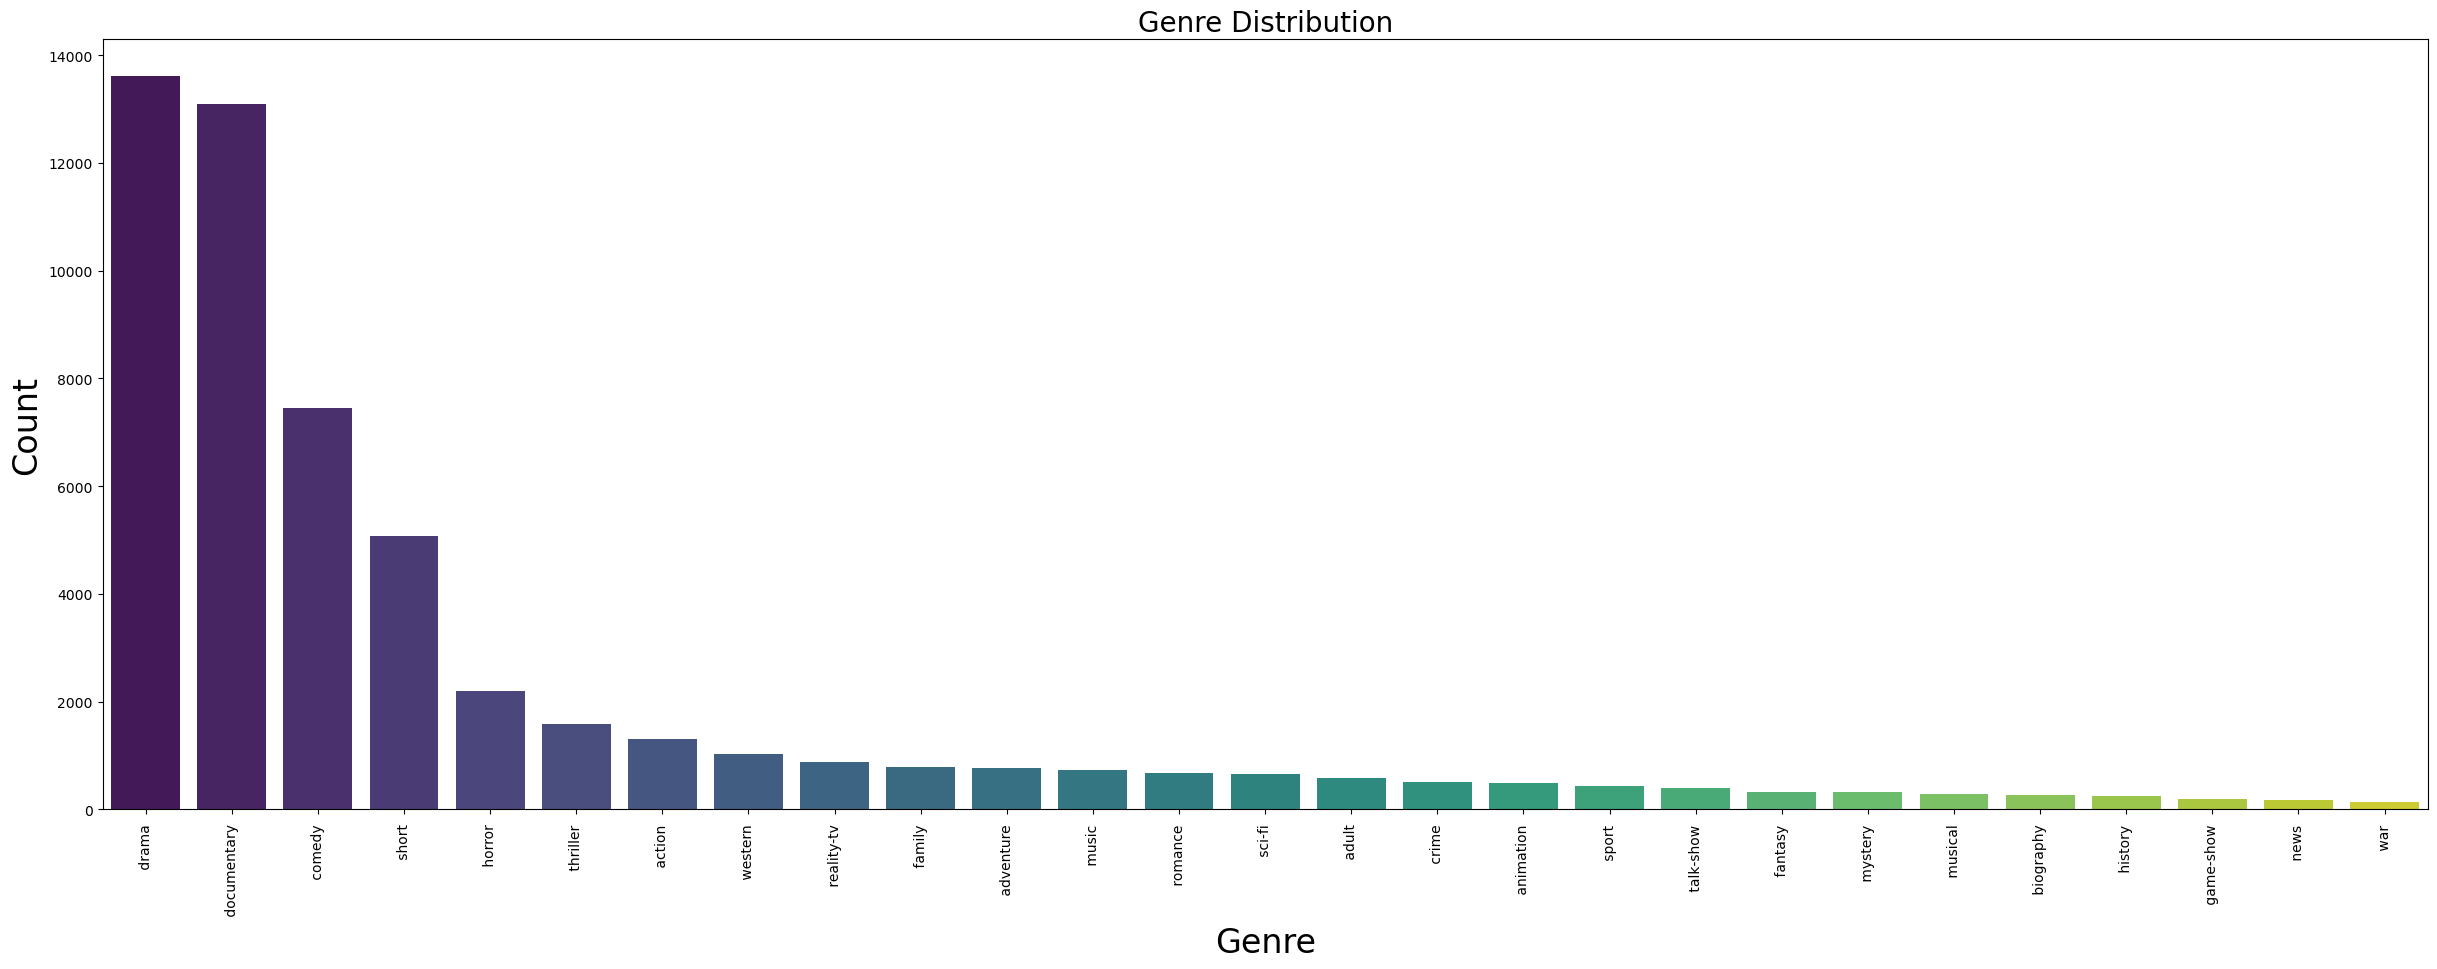

In [95]:
plt.figure(figsize=(30,10)) # Size for the Graph
counts = train_data.genre.value_counts()
sns.barplot(
x=counts.index, 
y=counts,
hue=counts.index,  # Assign the `x` variable to `hue`
palette="viridis", 
dodge=False,  # Ensures the bars don't split due to `hue`
legend=False  # Disable the legend since it's redundant here
)
plt.xlabel('Genre',fontsize=24)
plt.ylabel('Count',fontsize=24)
plt.title('Genre Distribution', fontsize=20)
plt.xticks(rotation=90);

In [96]:
train_data.describe(include=['object'])

,title,genre,description
count,54214,54214,54214
unique,54214,27,54086
top,Oscar et la dame rose (2009),drama,Grammy - music award of the American academy ...
freq,1,13613,12


In [97]:
train_data.genre.value_counts()

genre
drama           13613
documentary     13096
comedy           7447
short            5073
horror           2204
thriller         1591
action           1315
western          1032
reality-tv        884
family            784
adventure         775
music             731
romance           672
sci-fi            647
adult             590
crime             505
animation         498
sport             432
talk-show         391
fantasy           323
mystery           319
musical           277
biography         265
history           243
game-show         194
news              181
war               132
Name: count, dtype: int64

## **Data Cleaning & Preprocessing**

In [99]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54214 entries, 0 to 54213
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Id           54214 non-null  int64 
 1   title        54214 non-null  object
 2   genre        54214 non-null  object
 3   description  54214 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.7+ MB


In [100]:
train_data.isnull().sum()

Id             0
title          0
genre          0
description    0
dtype: int64

In [101]:
print("shape before drop nulls",train_data.shape)
# Droping the redundant data
train_data = train_data.drop_duplicates()
print("shape after drop nulls",train_data.shape)

shape before drop nulls (54214, 4)
shape after drop nulls (54214, 4)


In [102]:
def get_top_n_bigram(corpus, n=None):
    vec = CV(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

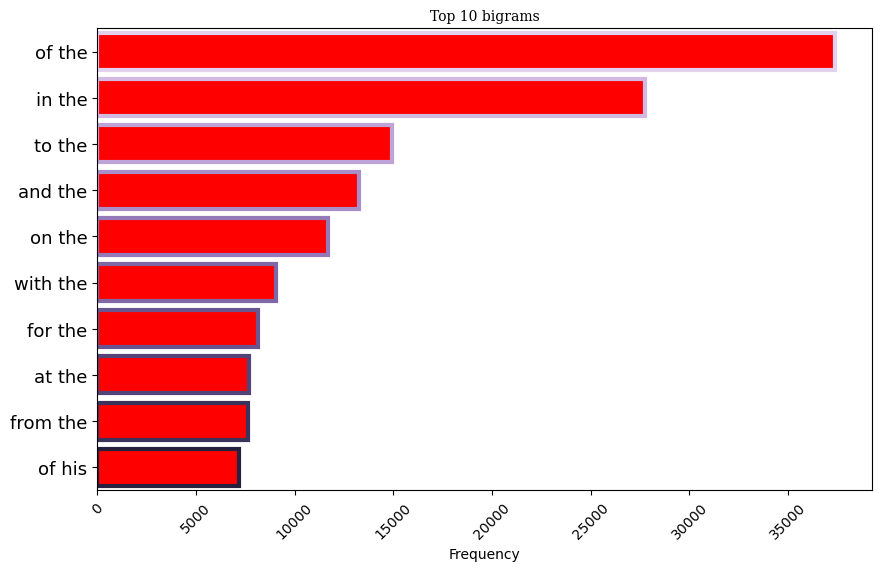

In [113]:
common_words = get_top_n_bigram(train_data['description'], 10)
common_words_df = pd.DataFrame(common_words,columns=['word','freq'])
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='freq', y='word', data=common_words_df,facecolor='Red',linewidth=3,edgecolor=sns.color_palette("ch:start=3, rot=.1",10))

plt.title("Top 10 bigrams",font='Serif')
plt.xlabel("Frequency", fontsize=10)
plt.yticks(fontsize=13)
plt.xticks(rotation=45, fontsize=10)
plt.ylabel("");

## **Label Encoding of the Target variable**


In [106]:
le = LabelEncoder()
train_data['genre'] = le.fit_transform(train_data['genre'].values)

# keep only relevent columns
train_data = train_data.loc[:,['description', 'genre']]
test_data = test_data.loc[:,['description', 'title']]
train_data.head(10)

,description,genre
0,Listening in to a conversation between his do...,8
1,A brother and sister with a past incestuous r...,24
2,As the bus empties the students for their fie...,1
3,To help their unemployed father make ends mee...,8
4,The film's title refers not only to the un-re...,8
5,Quality Control consists of a series of 16mm ...,7
6,In tough economic times Max and Joey have all...,5
7,Ron Petrie (Keanu Reeves) is a troubled teen ...,6
8,"A sudden calamitous event, causing great loss...",18
9,Four high school students embark on a terrify...,13


## **Train Test Split**

In [111]:
train_set , val_set , train_label , val_label = train_test_split(train_data['description'] , train_data['genre'] , test_size=0.2 , shuffle=True , random_state = 42)
print(f'Split data into train and eval sets')
print(f'Trani Set\t: {len(train_set)}\nValidation Set\t: {len(val_set)}')

Split data into train and eval sets
Trani Set	: 43371
Validation Set	: 10843


## **Feature Extraction**

In [59]:
# using TF-IDF
vectorize = TfidfVectorizer(stop_words='english', max_features=100000)
train_set_tfidf = vectorize.fit_transform(train_set)
val_set_tfidf = vectorize.transform(val_set)

In [65]:
 #using BOW- BoW, which stands for Bag of Words in TF-IDF
 vectorize = CV()
 train_set_tfidf = vectorize.fit_transform(train_set)
 val_set_tfidf = vectorize.transform(val_set)

## **[1] Logistic Regression Model (LR)**

In [136]:
LR_model = LogisticRegression()
LR_model.fit(train_set_tfidf, train_label)
predict_LR = LR_model.predict(val_set_tfidf)
print(classification_report(val_label, predict_LR))
LR_accuracy = accuracy_score(predict_LR,val_label)
print('Logistic Regression accuracy is: {:.2f}%'.format(LR_accuracy*100))

D:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.44      0.33      0.38       263
           1       0.55      0.49      0.52       112
           2       0.33      0.23      0.27       139
           3       0.37      0.16      0.23       104
           4       0.05      0.02      0.03        61
           5       0.56      0.57      0.57      1443
           6       0.23      0.08      0.12       107
           7       0.70      0.80      0.75      2659
           8       0.57      0.72      0.64      2697
           9       0.30      0.20      0.24       150
          10       0.14      0.09      0.11        74
          11       0.77      0.60      0.68        40
          12       0.00      0.00      0.00        45
          13       0.62      0.60      0.61       431
          14       0.60      0.51      0.55       144
          15       0.27      0.12      0.17        50
          16       0.40      0.11      0.17        56
          17       0.40    

## **[2] Multinomial Naive Bayes Model (MultinomialNB)**

In [70]:
# Train a Naive Bayes classifier
NB_model = MultinomialNB()
NB_model.fit(train_set_tfidf, train_label)
y_pred_naive = NB_model.predict(val_set_tfidf)
print(classification_report(val_label, y_pred_naive))
naive_accuracy = accuracy_score(y_pred_naive,val_label)
print('Naive Bayes model accuracy is: {:.2f}%'.format(naive_accuracy*100))

              precision    recall  f1-score   support

           0       0.78      0.03      0.05       263
           1       0.50      0.01      0.02       112
           2       0.21      0.02      0.04       139
           3       0.00      0.00      0.00       104
           4       0.00      0.00      0.00        61
           5       0.52      0.44      0.48      1443
           6       0.00      0.00      0.00       107
           7       0.55      0.91      0.68      2659
           8       0.46      0.81      0.59      2697
           9       0.00      0.00      0.00       150
          10       0.00      0.00      0.00        74
          11       1.00      0.03      0.05        40
          12       0.00      0.00      0.00        45
          13       0.76      0.24      0.36       431
          14       0.73      0.06      0.10       144
          15       0.00      0.00      0.00        50
          16       0.00      0.00      0.00        56
          17       0.00    

D:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## **[3] Decision Tree Model (ID3)**

In [114]:
DT = DecisionTreeClassifier(max_depth=(1), random_state=0)
DT.fit(train_set_tfidf, train_label)
predict_ID3 = DT.predict(val_set_tfidf)
print(classification_report(val_label, predict_ID3))
ID3_accuracy = accuracy_score(predict_ID3,val_label)
print('ID3 model accuracy is: {:.2f}%'.format(ID3_accuracy*100))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       263
           1       0.00      0.00      0.00       112
           2       0.00      0.00      0.00       139
           3       0.00      0.00      0.00       104
           4       0.00      0.00      0.00        61
           5       0.00      0.00      0.00      1443
           6       0.00      0.00      0.00       107
           7       0.83      0.31      0.45      2659
           8       0.27      0.99      0.43      2697
           9       0.00      0.00      0.00       150
          10       0.00      0.00      0.00        74
          11       0.00      0.00      0.00        40
          12       0.00      0.00      0.00        45
          13       0.00      0.00      0.00       431
          14       0.00      0.00      0.00       144
          15       0.00      0.00      0.00        50
          16       0.00      0.00      0.00        56
          17       0.00    

D:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## **[4] Support Vector Machine Model (SVC)**

In [140]:
# Train a SVC classifier
from sklearn.svm import LinearSVC
svm_model = LinearSVC()
svm_model.fit(train_set_tfidf, train_label)
predict = svm_model.predict(val_set_tfidf)

print(classification_report(val_label, predict))
svm_accuracy = accuracy_score(predict,val_label)
print('SVC model accuracy is: {:.2f}%'.format(svm_accuracy*100))

              precision    recall  f1-score   support

           0       0.33      0.29      0.31       263
           1       0.57      0.39      0.47       112
           2       0.26      0.26      0.26       139
           3       0.30      0.20      0.24       104
           4       0.03      0.02      0.02        61
           5       0.49      0.52      0.50      1443
           6       0.22      0.12      0.16       107
           7       0.70      0.72      0.71      2659
           8       0.54      0.61      0.58      2697
           9       0.21      0.17      0.19       150
          10       0.13      0.07      0.09        74
          11       0.81      0.62      0.70        40
          12       0.08      0.02      0.04        45
          13       0.59      0.58      0.59       431
          14       0.52      0.53      0.53       144
          15       0.07      0.04      0.05        50
          16       0.12      0.09      0.10        56
          17       0.23    

D:\Anaconda\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [142]:
columns=['LogisticRegression', 'MultinomialNB', 'Decision_Tree','SVC']
accuracy= [LR_accuracy, naive_accuracy, ID3_accuracy, svm_accuracy]

FinalResult=pd.DataFrame({'Algorithm':columns, 'Accuracy':accuracy})

FinalResult

,Algorithm,Accuracy
0,LogisticRegression,0.582865
1,MultinomialNB,0.514710
2,Decision_Tree,0.322420
3,SVC,0.523102


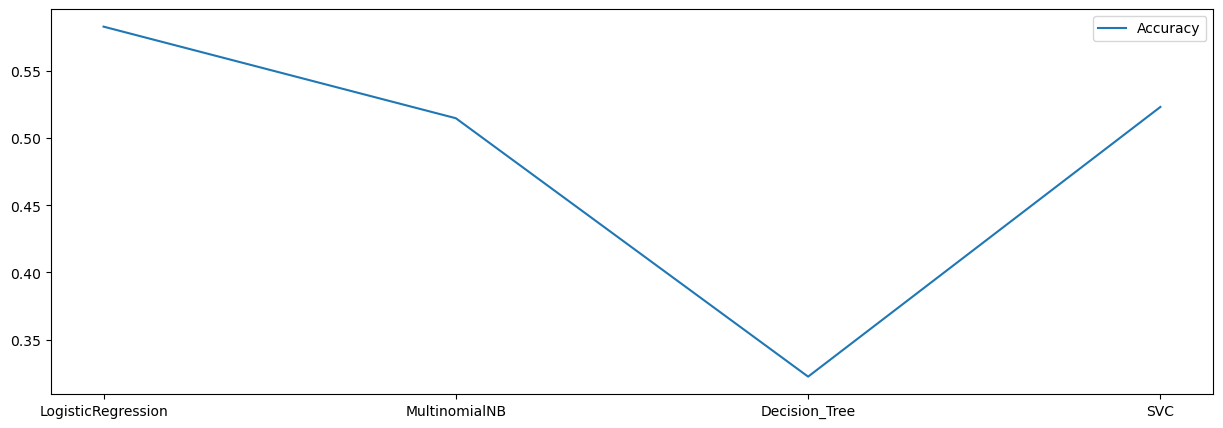

In [144]:
fig,ax=plt.subplots(figsize=(15,5))
plt.plot(FinalResult.Algorithm,accuracy,label="Accuracy")
plt.legend()
plt.show()